# Video Similarity Search

This notebook loads the existing Pixeltable pipeline from `d2.ipynb`, inserts new videos, and runs a similarity search over transcribed sentences.

In [1]:
import pixeltable as pxt
import pixeltable.functions as pxtf

## Base table

In [2]:
t = pxt.get_table('olympics.skates')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/alison-pxt/.pixeltable/pgdata


/Users/alison-pxt/Documents/Github/pxt-d2/.venv/lib/python3.13/site-packages/pixeltable/env.py:494: UserWarning: Progress reporting is disabled because ipywidgets is not installed. To fix this, run: `pip install ipywidgets`
  warnings.warn(


In [3]:
t

table 'olympics/skates'

 Column Name   Type                       Computed With Comment
       video  Video                                            
       audio  Audio  extract_audio(video, format='wav')

video,audio
,

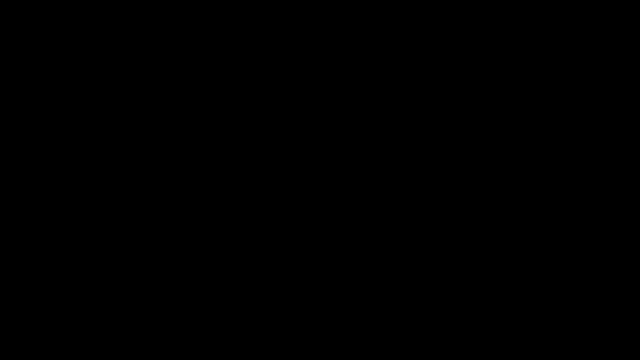

In [4]:
t.collect()

## View #1: Audio chunks view

In [5]:
ac_view = pxt.get_table('olympics.audio_chunks')

In [6]:
ac_view

view 'olympics/audio_chunks' (of 'olympics/skates')

      Column Name             Type                                      Computed With Comment
              pos    Required[Int]                                                           
   start_time_sec  Required[Float]                                                           
     end_time_sec  Required[Float]                                                           
      audio_chunk            Audio                                                           
       transcript             Json  transcriptions(audio_chunk, model='whisper-1',...        
  transcript_text           String                     transcript.text.astype(String)        
            video            Video                                                           
            audio            Audio                 extract_audio(video, format='wav')

In [7]:
ac_view.count()

28

pos,start_time_sec,end_time_sec,audio_chunk,transcript,transcript_text,video,audio
0,0.,15.019,,"{""text"": ""A bit of a shaky start, then a team goal, a glimpse of what is possible in the short and now a stage that is his to grasp a moment, make a statement."", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}","A bit of a shaky start, then a team goal, a glimpse of what is possible in the short and now a stage that is his to grasp a moment, make a statement.",,
1,15.,30.019,,"{""text"": ""and win gold. Elia Maliner. The only true wisdom is in knowing"", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}",and win gold. Elia Maliner. The only true wisdom is in knowing,,
2,30.,45.019,,"{""text"": ""You know nothing The lost Is in the unknown"", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}",You know nothing The lost Is in the unknown,,

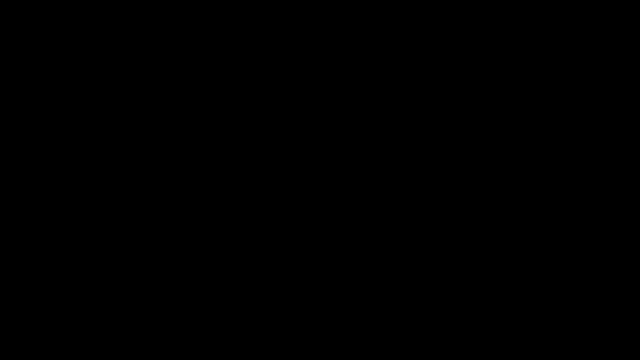
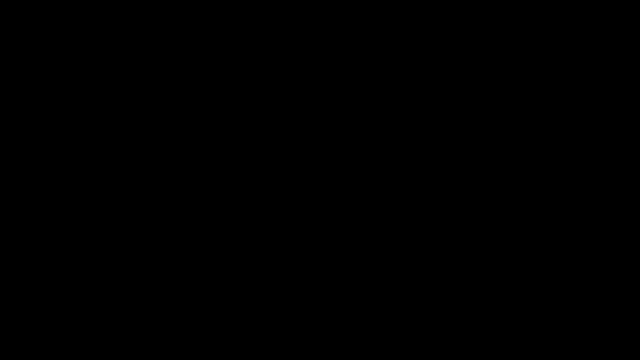
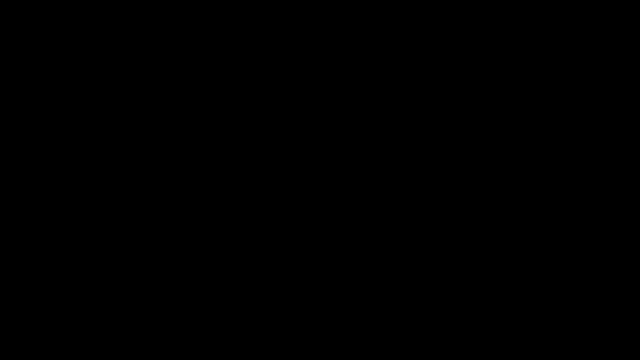

In [8]:
ac_view.head(3)

## View #2: Sentences view

In [9]:
sent_view = pxt.get_table('olympics.transcript_chunks')

Loading weights: 100%|██████████| 199/199 [00:00<00:00, 2417.54it/s, Materializing param=pooler.dense.weight]                        
MPNetModel LOAD REPORT from: sentence-transformers/all-mpnet-base-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [10]:
sent_view

view 'olympics/transcript_chunks' (of 'olympics/audio_chunks', 'olympics/skates')

      Column Name              Type                                      Computed With Comment
              pos     Required[Int]                                                           
             text  Required[String]                                                           
   start_time_sec   Required[Float]                                                           
     end_time_sec   Required[Float]                                                           
      audio_chunk             Audio                                                           
       transcript              Json  transcriptions(audio_chunk, model='whisper-1',...        
  transcript_text            String                     transcript.text.astype(String)        
            video             Video                                                           
            audio             Audio                 extract_audio(video, format='wav')        

 Index Name Column  Metric                                          Embedding
       idx0   text  cosine  sentence_transformer(text, model_id='sentence-...

In [11]:
sent_view.count()

50

pos,text,start_time_sec,end_time_sec,audio_chunk,transcript,transcript_text,video,audio
0,"A bit of a shaky start, then a team goal, a glimpse of what is possible in the short and now a stage that is his to grasp a moment, make a statement.",0.,15.019,,"{""text"": ""A bit of a shaky start, then a team goal, a glimpse of what is possible in the short and now a stage that is his to grasp a moment, make a statement."", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}","A bit of a shaky start, then a team goal, a glimpse of what is possible in the short and now a stage that is his to grasp a moment, make a statement.",,
0,and win gold.,15.,30.019,,"{""text"": ""and win gold. Elia Maliner. The only true wisdom is in knowing"", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}",and win gold. Elia Maliner. The only true wisdom is in knowing,,
1,Elia Maliner.,15.,30.019,,"{""text"": ""and win gold. Elia Maliner. The only true wisdom is in knowing"", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}",and win gold. Elia Maliner. The only true wisdom is in knowing,,

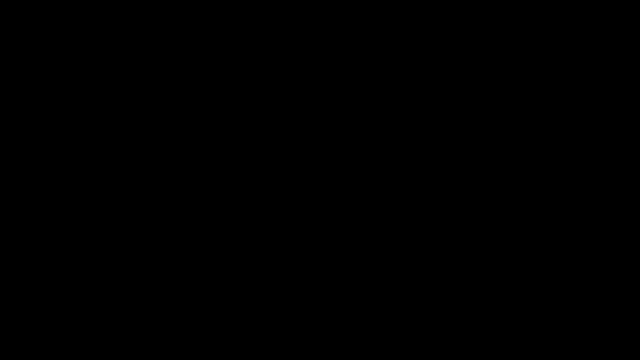
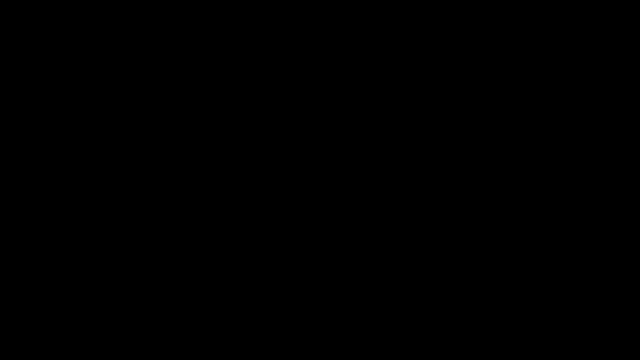
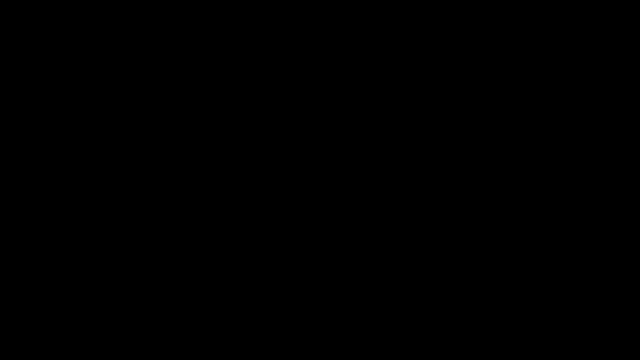

In [12]:
sent_view.head(3)

## Insert into the base table

In [13]:
t.insert([
    {'video': 'https://github.com/apreshill/pxt-d2/raw/refs/heads/main/media/olympics-glenn.mp4'},
    {'video': 'https://github.com/apreshill/pxt-d2/raw/refs/heads/main/media/olympics-liu.mp4'}
])

ERROR:asyncio:Exception in callback Task.__step()
handle: <Handle Task.__step() created at /Users/alison-pxt/miniconda3/lib/python3.13/asyncio/tasks.py:127>
source_traceback: Object created at (most recent call last):
  File "/Users/alison-pxt/Documents/Github/pxt-d2/.venv/lib/python3.13/site-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/Users/alison-pxt/miniconda3/lib/python3.13/asyncio/events.py", line 89, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/alison-pxt/miniconda3/lib/python3.13/asyncio/tasks.py", line 293, in __step
    self.__step_run_and_handle_result(exc)
  File "/Users/alison-pxt/miniconda3/lib/python3.13/asyncio/tasks.py", line 304, in __step_run_and_handle_result
    result = coro.send(None)
  File "/Users/alison-pxt/Documents/Github/pxt-d2/.venv/lib/python3.13/site-packages/ipykernel/utils.py", line 60, in run_in_context
    return await asyncio.create_task(coro, context=context)
  File "/Users/alison-pxt/min

Inserted 216 rows with 0 errors in 16.44 s (13.14 rows/s)


216 rows inserted.

video,audio
,
,
,

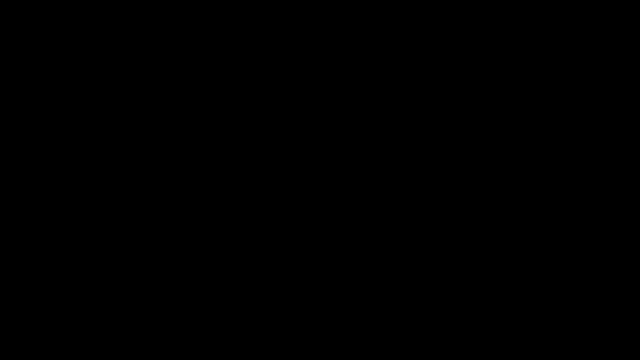
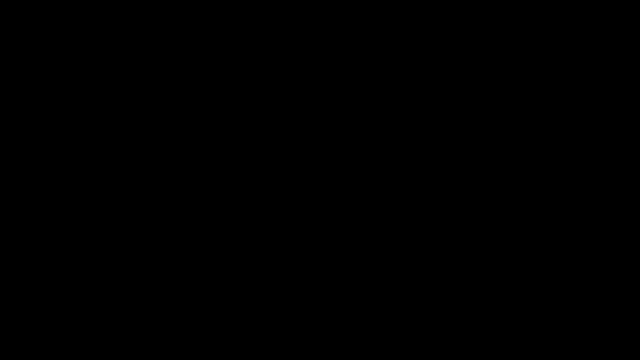
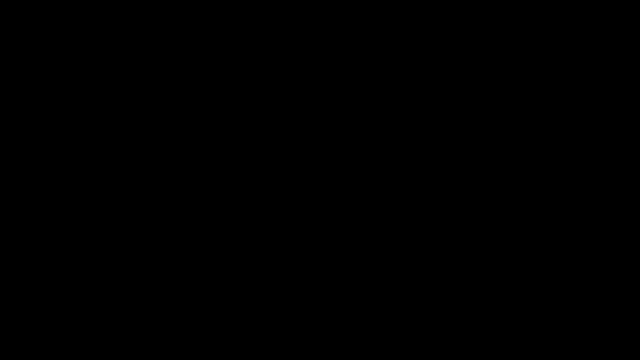

In [14]:
t.collect()

ERROR:asyncio:Task was destroyed but it is pending!
source_traceback: Object created at (most recent call last):
  File "/Users/alison-pxt/Documents/Github/pxt-d2/.venv/lib/python3.13/site-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/Users/alison-pxt/Documents/Github/pxt-d2/.venv/lib/python3.13/site-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/Users/alison-pxt/miniconda3/lib/python3.13/asyncio/events.py", line 89, in _run
    self._context.run(self._callback, *self._args)
  File "/Users/alison-pxt/Documents/Github/pxt-d2/.venv/lib/python3.13/site-packages/tornado/platform/asyncio.py", line 208, in _handle_events
    handler_func(fileobj, events)
  File "/Users/alison-pxt/Documents/Github/pxt-d2/.venv/lib/python3.13/site-packages/zmq/eventloop/zmqstream.py", line 600, in _handle_events
    self._handle_recv()
  File "/Users/alison-pxt/Documents/Github/pxt-d2/.venv/lib/python3.13/site-packages/zmq/eventloop/zmqstr

pos,start_time_sec,end_time_sec,audio_chunk,transcript,transcript_text,video,audio
30,450.,465.019,,"{""text"": ""Wow! Oh yeah! Podium gone!"", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}",Wow! Oh yeah! Podium gone!,,
31,465.,480.019,,"{""text"": ""The first medal for the American women since 2006, when Sasha Cohen won her Olympic medal. Incredible."", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}","The first medal for the American women since 2006, when Sasha Cohen won her Olympic medal. Incredible.",,
32,480.,483.416,,"{""text"": ""you"", ""usage"": {""type"": ""duration"", ""seconds"": 4.}, ""logprobs"": null}",you,,

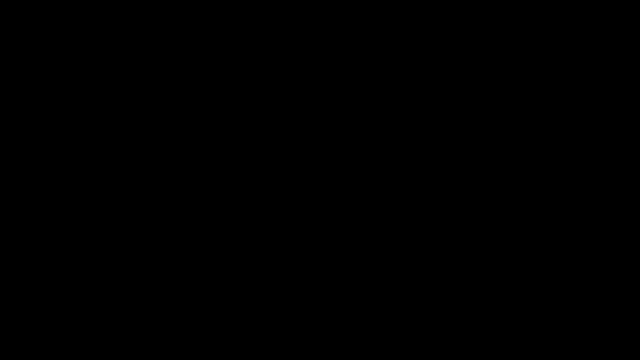
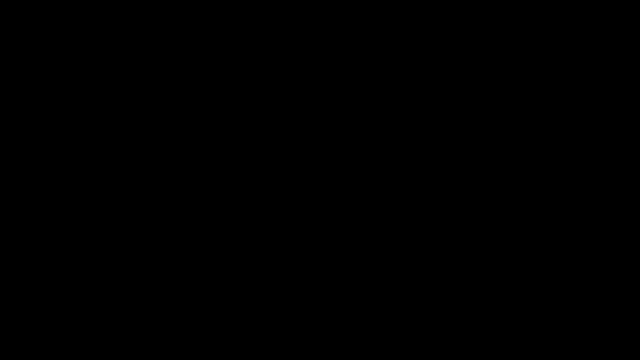
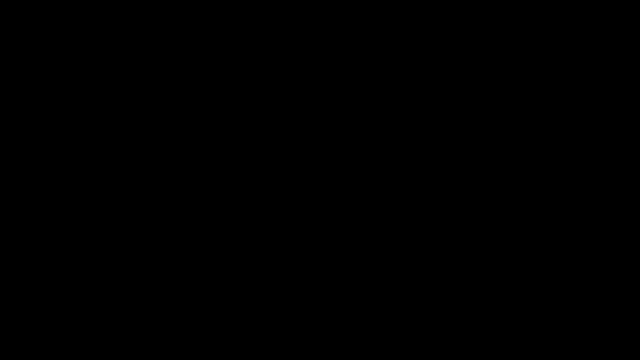

In [15]:
ac_view.tail(3)

pos,text,start_time_sec,end_time_sec,audio_chunk,transcript,transcript_text,video,audio
0,"The first medal for the American women since 2006, when Sasha Cohen won her Olympic medal.",465.,480.019,,"{""text"": ""The first medal for the American women since 2006, when Sasha Cohen won her Olympic medal. Incredible."", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}","The first medal for the American women since 2006, when Sasha Cohen won her Olympic medal. Incredible.",,
1,Incredible.,465.,480.019,,"{""text"": ""The first medal for the American women since 2006, when Sasha Cohen won her Olympic medal. Incredible."", ""usage"": {""type"": ""duration"", ""seconds"": 16.}, ""logprobs"": null}","The first medal for the American women since 2006, when Sasha Cohen won her Olympic medal. Incredible.",,
0,you,480.,483.416,,"{""text"": ""you"", ""usage"": {""type"": ""duration"", ""seconds"": 4.}, ""logprobs"": null}",you,,

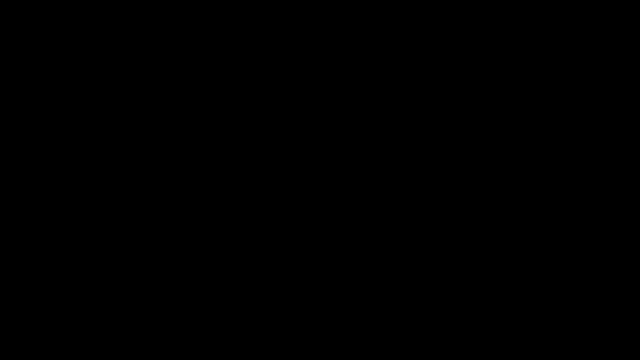
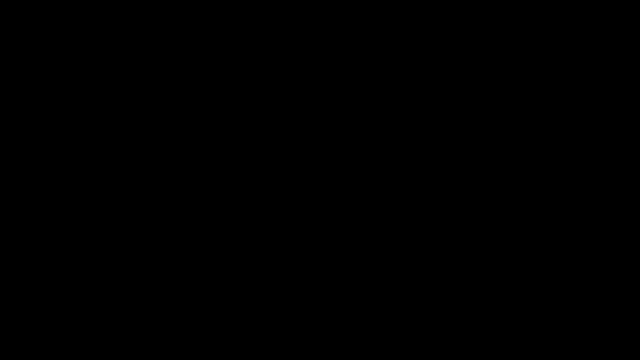
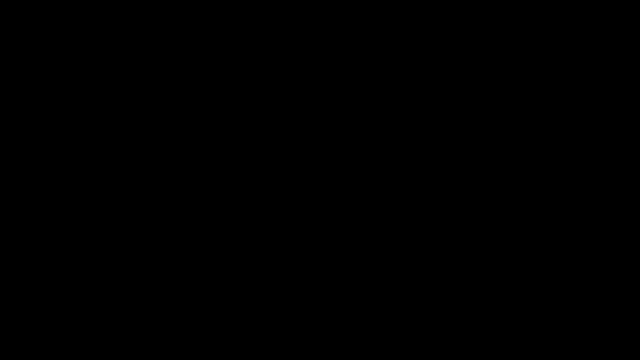

In [16]:
sent_view.tail(3)

## Sentence-Level Semantic Search

In [23]:
query_text = 'gold medal'
sim = sent_view.text.similarity(string=query_text)

results = (
    sent_view
    .order_by(sim, asc=False)
    .select(sent_view.text, sent_view.pos, sent_view.audio_chunk, similarity=sim)
    .limit(3)
    .collect()
)
results

text,pos,audio_chunk,similarity
medals.,0,,0.708
"The first medal for the American women since 2006, when Sasha Cohen won her Olympic medal.",0,,0.621
Probably means a medal.,1,,0.619


## View the table hierarchy & history

In [18]:
pxt.list_tables('olympics')

['olympics/audio_chunks', 'olympics/transcript_chunks', 'olympics/skates']

In [19]:
t.history()

,version,created_at,user,change_type,inserts,updates,deletes,errors,schema_change
0,3,2026-02-25 18:45:42.509683+00:00,None,data,216,0,0,0,NaN
1,2,2026-02-25 18:42:59.086687+00:00,None,schema,0,1,0,0,Added: audio
2,1,2026-02-25 18:42:58.980058+00:00,None,data,1,0,0,0,NaN
3,0,2026-02-25 18:42:58.939237+00:00,None,schema,0,0,0,0,Initial Version


In [20]:
ac_view.history()

,version,created_at,user,change_type,inserts,updates,deletes,errors,schema_change
0,3,2026-02-25 18:45:42.509683+00:00,None,data,214,0,0,0,NaN
1,2,2026-02-25 18:43:30.295068+00:00,None,schema,0,28,0,0,Added: transcript_text
2,1,2026-02-25 18:42:59.728673+00:00,None,schema,0,28,0,0,Added: transcript
3,0,2026-02-25 18:42:59.521788+00:00,None,schema,28,0,0,0,Initial Version


In [21]:
sent_view.history()

,version,created_at,user,change_type,inserts,updates,deletes,errors,schema_change
0,2,2026-02-25 18:45:42.509683+00:00,None,data,148,0,0,0,NaN
1,1,2026-02-25 18:43:30.661873+00:00,None,data,50,0,0,0,NaN
2,0,2026-02-25 18:43:30.407615+00:00,None,schema,50,0,0,0,Initial Version
